## Data Cleaning: Listings.cvs

`Listings.cvs` contains detailed listings data, including various attributes (features) of each listing such as number of bedrooms, bathrooms, location, etc. The raw data contains 27,392 records and 52 columns. We will first load the data into a Pandas dataframe; however, not all of these columns are applicable for predicting listing prices. We will select the applicable predictors as follows:

### Column Selection

#### Selected Columns
- id
- host_id
- zipcode
- property_type
- room_type
- accommodates
- bathrooms
- bedrooms
- beds
- bed_type
- price
- guests_included
- number_of_reviews
- review_scores_rating
- host_listing_count
    
#### Removed Columns
- scrape_id
- last_scraped
- name (title used in the listing)
- picture_url
    - future studies may choose to integrate image analysis as a predictor
- host_name
    - there may certainly be some predictive power when considering gender / ethnicity of the name; however, we chose not to incorporate host_name for various ethical reasons as well as difficulty in discerning gender neutral names let alone ethnicity from a name
- host_since
    - better explained by number of reviews since a long time host may not actually have made any listings made over that period of time
- host_picture_url
- street
- neighbourhood
- neighbourhood_cleansed
- city
- state
    - these location features are better explained by zipcode, which will be easier to turn into a hot encoding as well
- market
- country
- latitude
- longitude
    - location again better explained by zipcode
- is_location_exact
- bathrooms
- square_feet
    - had many missing column values
- weekly_price
- monthly_price
- extra_people
- minimum_nights
- maximum_nights
- calendar_updated
- availability_30
    - whether we need this is questionable since we're trying to predict pricing on a specific day; however, another study did choose to leave this in
- availability_60
- availability_90
- availability_365
- calendar_last_scraped
- first_review
- last_review
- review_score_accuracy -- review_scores_value

In [86]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline

In [87]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'guests_included',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count'
]

data = pd.read_csv('../datasets/raw_datasets/listings.csv', usecols=cols)

In [88]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,guests_included,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,$160.00,2,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,3.0,3.0,Real Bed,$105.00,1,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,$58.00,1,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,$185.00,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,$195.00,1,1,100.0,1


In [89]:
# determine the number of missing entries in each column
for col in data.columns:
    print col + ', Number of Missing Values:', len(data[col][data[col].isnull()])

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
zipcode, Number of Missing Values: 162
property_type, Number of Missing Values: 6
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bedrooms, Number of Missing Values: 140
beds, Number of Missing Values: 98
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
guests_included, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 8657
host_listing_count, Number of Missing Values: 0


### Data Cleaning

1. We drop any entries that are missing (NaN) values (except for review_scores_rating).
2. We convert the format in `price` from $1.00 into a float of 1.00. 
3. We also drop any entries that are inconsistent; i.e. predictors `accommodates`, `bedrooms`, `beds`, or `price` with a value of 0.
4. Convert ZipCode values such as 10022-4175 into 10022

In [90]:
# remove NaN values from dataframe
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds'])

# convert formatting for price
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

# drop any inconsistent values
data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

# convert ZipCode
data['zipcode'] = (data['zipcode'].str.replace(r'-\d+', ''))

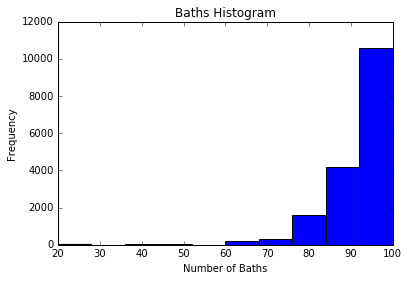

In [102]:
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Baths Histogram")
plt.xlabel("Number of Baths")
plt.ylabel("Frequency")